In [1]:
import os
os.environ['MATPLOTLIBRC'] = "../matplotlibrc" 
import sys
from tg_analysis import get_tg_data
import signac
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
BSU_BLUE = "#0033A0"
BSU_ORANGE = "#D64309"

data_path_small = '/home/mikehenry/small_tg_test/epoxpy-flow'
data_path_large = '/home/sthomas/projects/LB_mixing/'


print("building small df")
project = signac.get_project(data_path_small)
df_index = pd.DataFrame(project.index())
df_index = df_index.set_index(["_id"])
statepoints = {doc["_id"]: doc["statepoint"] for doc in project.index()}
df_S = pd.DataFrame(statepoints).T.join(df_index)
df_S = df_S.sort_values("T")
print("done")
print("building large df")
project = signac.get_project(data_path_large)
df_index = pd.DataFrame(project.index())
df_index = df_index.set_index(["_id"])
statepoints = {doc["_id"]: doc["statepoint"] for doc in project.index()}
df_L = pd.DataFrame(statepoints).T.join(df_index)
df_L = df_L.sort_values("T")
print("done")

building small df
done
building large df
done


In [3]:
alphas_S, fit_ydata_S, R2_S, cure_percents_S, Tgs_S = get_tg_data(data_path_small, df_S)
alphas_L, fit_ydata_L, R2_L, cure_percents_L, Tgs_L = get_tg_data(data_path_large, df_L)
print("done")

in common, indices: (array([ 0,  1,  2,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),)
00 0
in common, indices: (array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),)
00 0
in common, indices: (array([ 0,  1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),)
00 0
in common, indices: (array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),)
00 1
in common, indices: (array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),)
00 1
in common, indices: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,

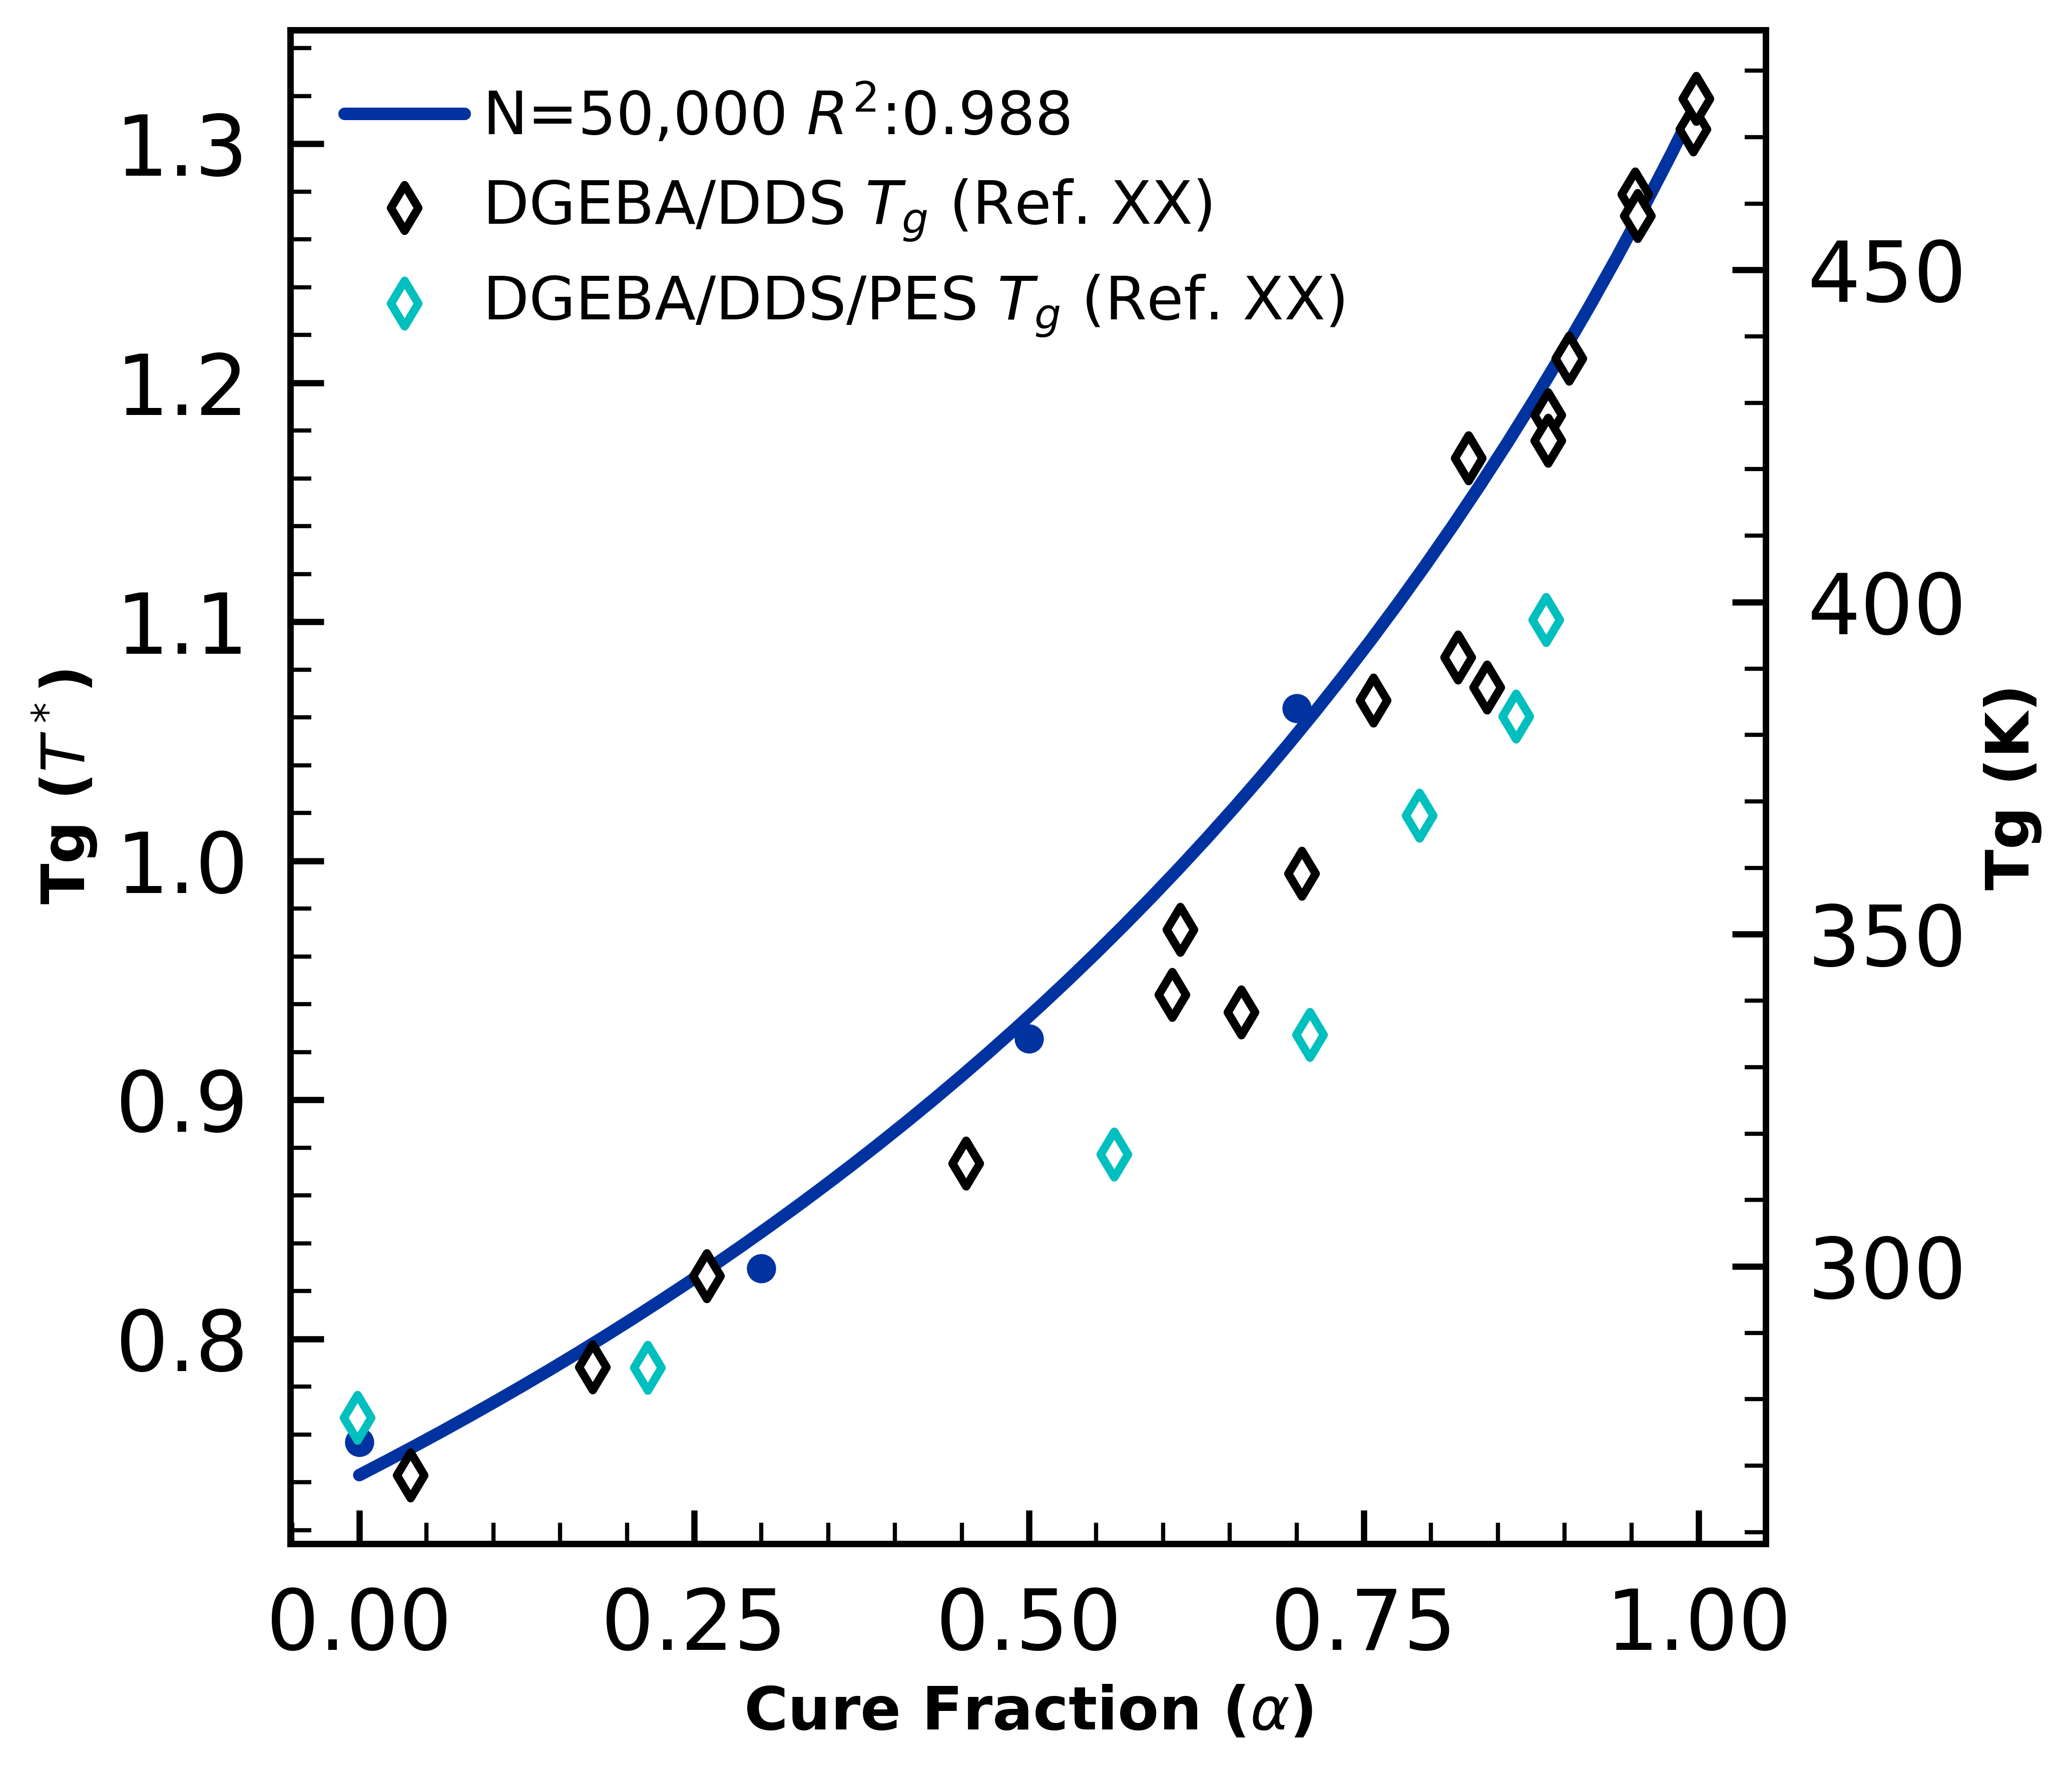

In [8]:
fig, ax1 = plt.subplots(dpi=600, figsize=(7, 6))
ax2=ax1.twinx()

#ax1.scatter(cure_percents_S/100., Tgs_S, color='r')
ax1.scatter(cure_percents_L/100., Tgs_L, color=BSU_BLUE)
#ax1.plot(alphas_S,fit_ydata_S,label='N=500 $R^2$:{}'.format(round(R2_S,3)), color="r")
ax1.plot(alphas_L,fit_ydata_L,label='N=50,000 $R^2$:{}'.format(round(R2_L,3)), color=BSU_BLUE)

exp1_data = np.genfromtxt('Min1993.txt',delimiter=',')

ax2.scatter(exp1_data[:,0],
                exp1_data[:,1],
                marker='d',
                facecolor='w',
                linewidth=2,
                edgecolor='k',
                s=60,
                #label='$E_a$:{}'.format(activation_energy),
                color='k',
               zorder=1,
               label='DGEBA/DDS $T_g$ (Ref. XX)')


exp2_data = np.genfromtxt('Jenninger2000.txt',delimiter=',')
ax2.scatter(exp2_data[:,0],
                exp2_data[:,1],
                marker='d',
                facecolor='w',
                linewidth=2,
                edgecolor='c',
                s=60,
                #label='$E_a$:{}'.format(activation_energy),
                color='c',
               zorder=1,
               label='DGEBA/DDS/PES $T_g$ (Ref. XX)')




#ax2.scatter(1.00,Tg_exp,marker='*',color='r',s=200,label='Experimental Tg ($\\alpha=1.0$)')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)
ax1.set_xlabel('Cure Fraction ($\\alpha$)')
ax1.set_ylabel('Tg ($T^*$)')
ax2.set_ylabel('Tg (K)')
plt.savefig("Tg_N_exp.png", transparent=True)
#ax1.legend(fontsize=10,loc='best')
#ax2.legend(fontsize=10,loc='center left')


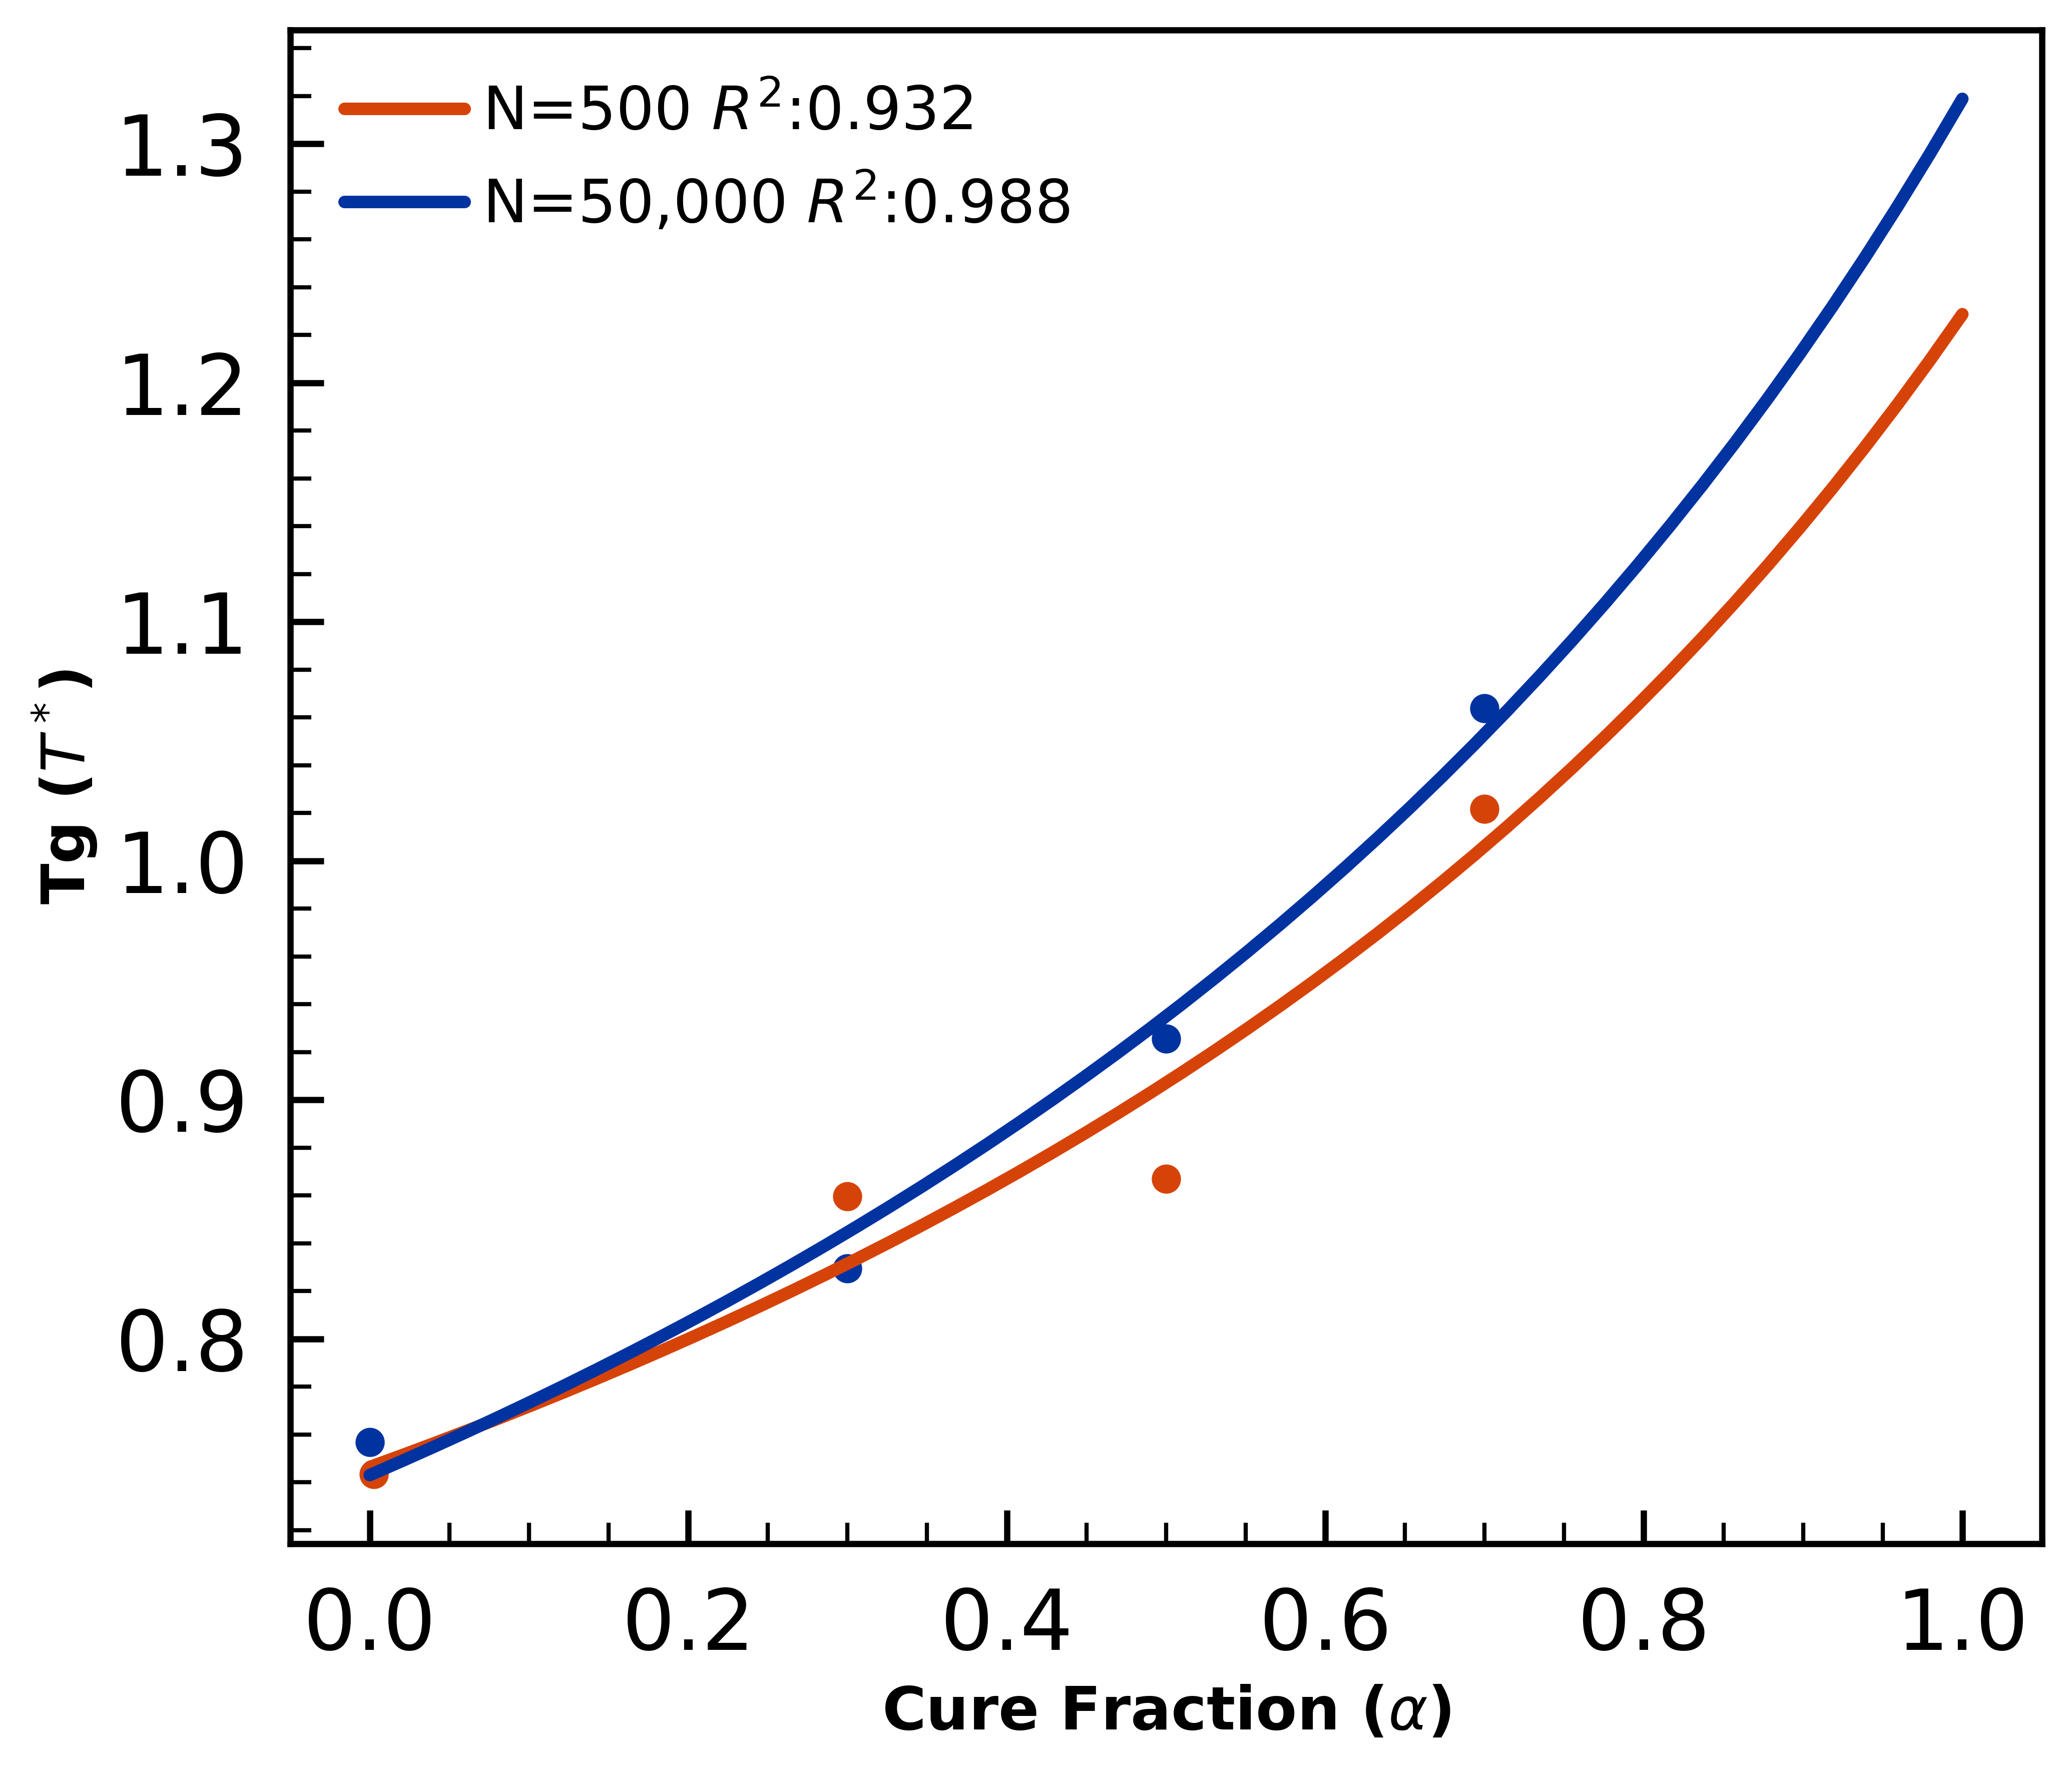

In [7]:
#plt.style.use('matplotlibrc')
fig, ax1 = plt.subplots(dpi=600, figsize=(7, 6))

ax1.scatter(cure_percents_S/100., Tgs_S, color=BSU_ORANGE)
ax1.scatter(cure_percents_L/100., Tgs_L, color=BSU_BLUE)
ax1.plot(alphas_S,fit_ydata_S,label='N=500 $R^2$:{}'.format(round(R2_S,3)), color=BSU_ORANGE)
ax1.plot(alphas_L,fit_ydata_L,label='N=50,000 $R^2$:{}'.format(round(R2_L,3)), color=BSU_BLUE)



#ax2.scatter(1.00,Tg_exp,marker='*',color='r',s=200,label='Experimental Tg ($\\alpha=1.0$)')

ax1.legend()
ax1.set_xlabel('Cure Fraction ($\\alpha$)')
ax1.set_ylabel('Tg ($T^*$)')
plt.savefig("Tg_N_sim.png", transparent=True)
#ax1.legend(fontsize=10,loc='best')
#ax2.legend(fontsize=10,loc='center left')
